# Вишинська Наталія, група ОІ-21сп, варіант 3, ЛР №4
## Опис даних:
### Набір даних складається з наступних стовпців:
- Type – тип тварини (1 – собака, 2 – кіт)
- Name – ім'я тварини
- Age – вік у місяцях
- Gender – стать тварини (1 – чоловіча, 2 – жіноча, 3 – невідома)
- MaturitySize – розмір дорослої особини (1 – маленька, 2 – середня, 3 – велика, 4 – дуже велика)
- FurLength – довжина шерсті (1 – коротка, 2 – середня, 3 – довга)
- Vaccinated – чи вакцинована тварина (1 – так, 2 – ні, 3 – невідомо)
- Dewormed – чи проглистована тварина
- Sterilized – чи стерилізована тварина
- Health – стан здоров'я (1 – здоровий, 2 – незначні проблеми, 3 – серйозні проблеми)
- AdoptionSpeed – швидкість усиновлення (0 – в день публікації, 1 – за тиждень, 2 – до місяця, 3 – після місяця, 4 – не був усиновлений) усиновлений)

In [2]:
import pandas as pd

In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [5]:
from sklearn.preprocessing import LabelEncoder
# Зчитування даних
ds = pd.read_csv("./new_dataset.csv")

# Відновлюємо масштабовані значення 'AdoptionSpeed'
ds['AdoptionSpeed'] = (ds['AdoptionSpeed'] * 4).round().astype(int)

# Автоматичне визначення текстових стовпців
text_columns = ds.select_dtypes(include=['object']).columns

# Перекодування текстових стовпців у числовий формат
for col in text_columns:
    le = LabelEncoder()
    ds[col] = le.fit_transform(ds[col])

## Вибір метрик для оцінки моделі
- **Accuracy**: Відсоток правильних передбачень серед усіх передбачень моделі.
- **Precision**: Частка правильних позитивних передбачень серед усіх передбачень, класифікованих як позитивні.
- **Recall**: Частка правильних позитивних передбачень серед усіх фактичних позитивних випадків.
- **F1-score**: Гармонійне середнє між precision і recall, яке є корисним для аналізу на незбалансованих даних.

In [7]:
from sklearn.metrics import classification_report

# Функція виводу метрик 
def print_classification_metrics(y_true, y_pred, name=str):
    print('Звіт метрик для:', name)
    print(classification_report(y_true, y_pred))

## Робота з незбалансованими класами

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTE

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import resample

# Створення ціольової змінної
ds['Target'] = ds['AdoptionSpeed'] # Швидкість усиновлення

# Розділ даних на класи
ds_class_0 = ds[ds['Target'] == 0] # 
ds_class_1 = ds[ds['Target'] == 1] # 
ds_class_2 = ds[ds['Target'] == 2] # 
ds_class_3 = ds[ds['Target'] == 3] # 
ds_class_4 = ds[ds['Target'] == 4] #

# Виконуємо downsampling (зменшення вибірки), щоб балансувати класи
min_class_size = min(len(ds_class_0), len(ds_class_1), len(ds_class_2),len(ds_class_3), len(ds_class_4))

ds_class_0_downsampled = resample(ds_class_0, replace=False, n_samples=min_class_size, random_state=442)
ds_class_1_downsampled = resample(ds_class_1, replace=False, n_samples=min_class_size, random_state=442)
ds_class_2_downsampled = resample(ds_class_2, replace=False, n_samples=min_class_size, random_state=442)
ds_class_3_downsampled = resample(ds_class_3, replace=False, n_samples=min_class_size, random_state=442)
ds_class_4_downsampled = resample(ds_class_4, replace=False, n_samples=min_class_size, random_state=442)

# Вивід кількості об'єктів для кожного класу
print("Вивід кількості об'єктів для кожного класу:")
print(ds['Target'].value_counts())

# Об'єднуємо збалансовані класи
ds_balanced = pd.concat([ds_class_0_downsampled, ds_class_1_downsampled, ds_class_2_downsampled, ds_class_3_downsampled, ds_class_4_downsampled])

# Вибір ознак та цільової змінної
target = ds_balanced['Target']
features = ds_balanced.drop(['Target', 'AdoptionSpeed'], axis=1)

# Розділ даних на тренувальні та тестові
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=442)

Вивід кількості об'єктів для кожного класу:
Target
4    373
2    352
3    290
1    284
0     57
Name: count, dtype: int64


- Зважаючи на кількість об’єктів у кожному класі, важливо зберегти всі дані, тому використаємо метод SMOTE для класів з меншою кількістю об'єктів.
### SMOTE

Розміри оригінальних даних: (820, 2) (820,)


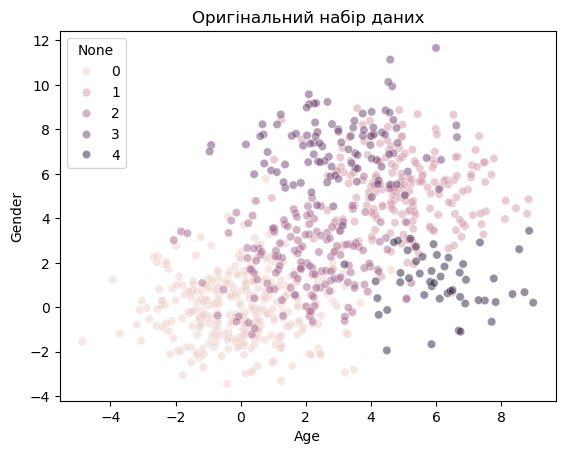

Розміри збалансованих даних: (1600, 2) (1600,)
Кількість спостережень у меншості (оригінал):
0    320
1    200
2    150
3    100
4     50
Name: count, dtype: int64
Кількість спостережень у меншості (після SMOTE):
0    320
1    320
2    320
3    320
4    320
Name: count, dtype: int64


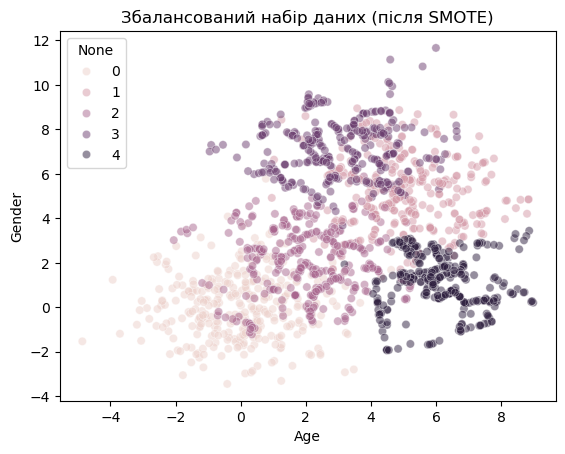

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTE

# Налаштування конфігурації
blobs_random_seed = 42
centers = [(0, 0), (5, 5), (2, 2), (3, 7), (6, 1)] 
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Генерація даних
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std,
    random_state=blobs_random_seed
)

# Перетворення масивів у формати pandas
X = pd.DataFrame(X, columns=['Age', 'Gender'])
y = pd.Series(y)

# Створення незбалансованого набору X
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=blobs_random_seed),
    X[y == 2].sample(150, random_state=blobs_random_seed),  # Зменшуємо кількість для класу 2
    X[y == 3].sample(100, random_state=blobs_random_seed),  # Зменшуємо кількість для класу 3
    X[y == 4].sample(50, random_state=blobs_random_seed)    # Зменшуємо кількість для класу 4
], axis=0)

y = y.loc[X.index]

# Вивід розмірів
print("Розміри оригінальних даних:", X.shape, y.shape)

# Візуалізація оригінальних даних
sns.scatterplot(data=X, x="Age", y="Gender", hue=y, alpha=0.5)
plt.title('Оригінальний набір даних')
plt.show()

# Використання SMOTE для збалансування даних
sm = SMOTE(
    sampling_strategy='auto',  # Зразки для всіх класів
    random_state=0,            # Для відтворюваності
    k_neighbors=5,
    n_jobs=4
)

X_res, y_res = sm.fit_resample(X, y)

# Розміри збалансованих даних
print("Розміри збалансованих даних:", X_res.shape, y_res.shape)

# Вивід кількості об'єктів для кожного класу
print("Кількість спостережень у меншості (оригінал):")
print(y.value_counts())
print("Кількість спостережень у меншості (після SMOTE):")
print(y_res.value_counts())

# Візуалізація збалансованих даних
sns.scatterplot(data=pd.DataFrame(X_res, columns=['Age', 'Gender']), x="Age", y="Gender", hue=y_res, alpha=0.5)
plt.title('Збалансований набір даних (після SMOTE)')
plt.show()


## Вибір гіперпараметрів та їх оптимізація
#### RandomizedSearchCV — це метод оптимізації гіперпараметрів, що використовується в машинному навчанні для підбору найкращих параметрів моделі. Він відрізняється від GridSearchCV тим, що тестує випадкову підмножину комбінацій гіперпараметрів замість перевірки всіх можливих комбінацій. Основні особливості RandomizedSearchCV:

- Випадковий вибір: Обирає випадкові комбінації з заданого простору гіперпараметрів, що робить його більш ефективним, особливо у великих просторах параметрів.
- Контроль ітерацій: Користувач може вказати кількість ітерацій (n_iter), що визначає, скільки комбінацій буде протестовано.
- Узагальнення: Сприяє уникненню перенавчання, що покращує узагальнюючу здатність моделі.
- Сумісність: Підходить для використання з різними моделями машинного навчання.
- Цей метод дозволяє знайти оптимальні параметри швидше і з меншою ймовірністю перенавчання, забезпечуючи більш якісні результати.

#### Random Forest — це ансамблевий метод, який використовує велику кількість рішень (дерев) для покращення точності прогнозування. Кожне дерево в моделі навчається на випадковій підмножині даних і вибирає випадкову підмножину ознак, що зменшує кореляцію між деревами. Основні переваги включають:

- Стійкість до перенавчання: Завдяки агрегації результатів з багатьох дерев.
- Добра продуктивність: Ефективний у роботі з великою кількістю ознак.
- Легкість в інтерпретації: Можливість оцінки важливості ознак.

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from scipy.stats import randint
from sklearn.model_selection import train_test_split

# Визначення гіперпараметрів
param_distributions_rf = {
    'n_estimators': [1, 2],  # Кількість дерев
    'max_depth': randint(1, 5),  # Максимальна глибина кожного дерева
    'min_samples_split': randint(2, 20),  # Мінімальна кількість зразків для поділу вузла
    'min_samples_leaf': randint(2, 20),  # Мінімальна кількість зразків у листі
    'max_features': [0.1]  # Кількість ознак у %, що використовуються при кожному розгалуженні
}

# Розділення збалансованих даних на тренувальну та тестову вибірки
X_train_res, X_test, y_train_res, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Ініціалізація та налаштування RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Оптимізація гіперпараметрів
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions_rf,
    n_iter=100,  
    scoring='f1_weighted',  
    cv=5,  
    n_jobs=-1,  
    random_state=42
)

# Навчання моделі на збалансованих даних
random_search_rf.fit(X_train_res, y_train_res)

# Прогнозування на тестовому наборі
y_pred = random_search_rf.predict(X_test)
# Вивід метрик для тестового набору (не для всього y_res)
print_classification_metrics(y_test, y_pred, "Random Forest")

Звіт метрик для: Random Forest
              precision    recall  f1-score   support

           0       0.80      0.85      0.83        67
           1       0.68      0.49      0.57        65
           2       0.74      0.74      0.74        70
           3       0.79      0.73      0.76        62
           4       0.73      0.98      0.84        56

    accuracy                           0.75       320
   macro avg       0.75      0.76      0.75       320
weighted avg       0.75      0.75      0.75       320



#### Логістична регресія — це метод для бінарної класифікації, який оцінює ймовірність належності до класу. Вона використовує логістичну функцію для перетворення лінійної комбінації ознак у ймовірність. Переваги:

- Простота: Легко реалізується і інтерпретується.
- Швидкість: Швидке навчання та прогнозування.
- Добра базова модель: Часто використовується як базова модель для оцінки.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from scipy.stats import uniform, randint

# Розділення збалансованих даних на тренувальну та тестову вибірки
X_train_res, X_test, y_train_res, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Ініціалізація логістичної регресії
log_reg = LogisticRegression(random_state=42)

# Гіперпараметри
param_distributions_log_reg = {
    'C': uniform(0.1, 5),  # Рівень регуляризації
    'penalty': ['l1', 'l2', 'none'],  # Тип регуляризації
    'solver': ['liblinear', 'saga', 'lbfgs'],  # Алгоритми для розв'язання
    'max_iter': randint(300, 500),  # Кількість ітерацій
    'tol': uniform(1e-6, 1e-2)  # Допустима похибка
}

# Оптимізація гіперпараметрів
random_search_log_reg = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_distributions_log_reg,
    n_iter=100,  # Кількість ітерацій
    scoring='f1_weighted',  # Метрика оцінювання
    cv=5,  # Поділ даних на 5 частин
    n_jobs=-1,  # Використання всіх доступних ядер процесора
    random_state=42
)

# Навчання моделі на збалансованих даних
random_search_log_reg.fit(X_train_res, y_train_res)

# Прогнозування на тестовому наборі
y_pred_log_reg = random_search_log_reg.predict(X_test)

# Вивід метрик для тестового набору
print_classification_metrics(y_test, y_pred_log_reg, "Logistic Regression")


Звіт метрик для: Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        67
           1       0.70      0.69      0.70        65
           2       0.83      0.77      0.80        70
           3       0.80      0.79      0.80        62
           4       0.90      0.96      0.93        56

    accuracy                           0.82       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.81      0.82      0.81       320



#### Наївний баєсівський класифікатор — це простий і швидкий метод, заснований на теорії Байєса з припущенням про незалежність ознак. Він часто використовується в задачах текстової класифікації. Основні переваги:

- Простота та швидкість: Легко реалізується та навчається, швидко робить прогнози.
- Ефективність з малими даними: Часто працює добре навіть з невеликими наборами даних.
- Гнучкість: Може бути використаний для бінарної та багатокласової класифікації.

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from scipy.stats import uniform

# Розділення збалансованих даних на тренувальну та тестову вибірки
X_train_res, X_test, y_train_res, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Ініціалізація наївного баєсового класифікатора
nb_classifier = GaussianNB()

# Гіперпараметри
param_distributions_nb = {
    'var_smoothing': uniform(1e-9, 1e-2)  # Параметр для згладжування дисперсії
}

# Оптимізація гіперпараметрів
random_search_nb = RandomizedSearchCV(
    estimator=nb_classifier,
    param_distributions=param_distributions_nb,
    n_iter=100,  # Кількість ітерацій
    scoring='f1_weighted',  # Метрика оцінювання
    cv=5,  # Поділ даних на 5 частин
    n_jobs=-1,  # Використання всіх доступних ядер процесора
    random_state=42
)

# Навчання моделі на збалансованих даних
random_search_nb.fit(X_train_res, y_train_res)

# Прогнозування на тестовому наборі
y_pred_nb = random_search_nb.predict(X_test)

# Вивід метрик для тестового набору
print_classification_metrics(y_test, y_pred_nb, "Naive Bayes Classifier")


Звіт метрик для: Naive Bayes Classifier
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        67
           1       0.68      0.66      0.67        65
           2       0.81      0.74      0.78        70
           3       0.79      0.77      0.78        62
           4       0.86      0.96      0.91        56

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.79      0.80      0.79       320



In [16]:
# Вивід найкращих гіперпараметрів для кожної моделі
best_params_rf = random_search_rf.best_params_
best_params_log_reg = random_search_log_reg.best_params_
best_params_nb = random_search_nb.best_params_

print("Найкращі гіперпараметри Random Forest:", best_params_rf)
print("Найкращі гіперпараметри Logistic Regression:", best_params_log_reg)
print("Найкращі гіперпараметри Bayes Classifier", best_params_nb)


Найкращі гіперпараметри Random Forest: {'max_depth': 4, 'max_features': 0.1, 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 2}
Найкращі гіперпараметри Logistic Regression: {'C': 0.294173672147116, 'max_iter': 314, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0012716051265188478}
Найкращі гіперпараметри Bayes Classifier {'var_smoothing': 0.003745402188473625}


## Аналіз результатів
### 1. Метрики для моделей:
### Random Forest:

- Точність (Precision): Від 0.68 до 0.80, з найвищим значенням для класу 0 (0.80).
- Повнота (Recall): Від 0.49 до 0.98, з найвищим значенням для класу 4 (0.98), але найнижчим для класу 1 (0.49).
- F1-скора: Від 0.57 до 0.84, що свідчить про хорошу збалансованість між точністю та повнотою.
- Загальна точність: 0.75, що вказує на помірну ефективність моделі.
### Logistic Regression:

- Точність (Precision): Від 0.70 до 0.90, з найвищим значенням для класу 4 (0.90).
- Повнота (Recall): Від 0.69 до 0.88, з найнижчим значенням для класу 1 (0.69).
- F1-скора: Від 0.70 до 0.93, з хорошими значеннями для більшості класів.
- Загальна точність: 0.82, що свідчить про високу ефективність моделі.
### Naive Bayes Classifier:

- Точність (Precision): Від 0.68 до 0.86, з найвищим значенням для класу 4 (0.86).
- Повнота (Recall): Від 0.66 до 0.96, з найнижчим значенням для класу 1 (0.66).
- F1-скора: Від 0.67 до 0.91, що показує хорошу загальну ефективність.
- Загальна точність: 0.80, що також свідчить про хорошу продуктивність моделі.
  
### 2. Порівняння моделей:
- Logistic Regression демонструє найкращі показники точності (0.82) та F1-скори для більшості класів, що робить її найбільш ефективною з трьох моделей.
- Naive Bayes Classifier має трохи нижчу загальну точність (0.80), але продовжує показувати хороші результати, особливо в класах 0 і 4.
- Random Forest показує найнижчу загальну точність (0.75) і має суттєво нижчу повноту для класу 1 (0.49), що свідчить про проблеми з ідентифікацією цього класу.

### 3. Гіперпараметри моделей:
- Гіперпараметри для Random Forest вказують на оптимальні налаштування з глибиною 4, що може  свідчити про помірну складність моделі.
- Для Logistic Regression оптимальні значення гіперпараметрів вказують на добре налаштовану модель, що може вказувати на стабільність та узгодженість у різних даних.
- Гіперпараметри для Naive Bayes Classifier вказують на узгодженість в моделюванні й можуть бути додатково оптимізовані для покращення результатів.
### Висновок:
- На основі отриманих результатів, Logistic Regression виявилася найефективнішою моделлю для даного набору даних, з хорошими показниками точності та F1-скори. Naive Bayes Classifier демонструє також добрі результати, але має нижчу точність у деяких класах. Random Forest показує найнижчу загальну ефективність, і це може свідчити про потребу в подальшій оптимізації, зокрема щодо класу 1. Рекомендується зосередитися на вдосконаленні Random Forest та проведенні додаткової налаштування гіперпараметрів для всіх моделей, щоб покращити загальні результати.